## Problem statement: 

Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan 
(Label ‘1’ & ’0’)

## Investigating the data and exploratory data analysis

First installing all the libraries that will use in our application. Installing the libraries in the first part because the algorithm we use later and the analysis we make more clearly will be done. Furthermore, investigating the data, presented some visualization and analyzed some features. Lets write it. Importing necessary packages and libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
#reading the file

os.chdir("C://Users//Public//Documents")


Now we are uploading our data set using the variable "data" in the pandas library.

In [3]:
data=pd.read_csv('sample_data_intw.csv')

In [4]:
#after the loading the data. Next step is to view/see the top 5 rows of the loaded data set
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.describe(include= 'all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


describe function is a function that allos analysis between the numeric, categorical values contained in the the dataset. Using this function count, mean,std, min,max,25%,50%,75%

In [6]:
#next, how many rows an columns are there in the loaded data set

data.shape

(209593, 37)

In [7]:
#we will be listing the columns of all the data.
#we will check all columns

data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

since unnamed: 0 is has more NaN values. So dropping that column

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
#after dropping the column
#we will check all columns once again

data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
#after removing one column checking how many rows and columns are their in the dataset

data.shape

(209593, 36)

Checking whether there is any null values in the columns

In [11]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [12]:
#once again analysis of both the values in the data set

data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Visualizing the pdate column and label column

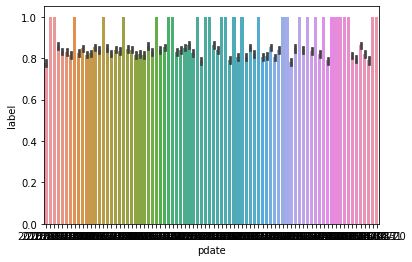

In [13]:
sn.barplot(x='pdate',y='label',data=data)

In [14]:
data[:][data['msisdn']=='04581I85330']

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
6275,1,04581I85330,513.0,99.792,99.792,1489.50,1489.50,1.0,0.0,1539,...,6.0,0.0,7.0,42,6,0.0,2.285714,2.285714,UPW,2016-06-18
14274,1,04581I85330,562.0,5206.792,5273.320,1889.76,2882.76,5.0,0.0,1539,...,6.0,0.0,13.0,78,6,0.0,2.444444,2.615385,UPW,2016-07-12
33543,1,04581I85330,509.0,88.704,88.704,1324.00,1324.00,1.0,0.0,1539,...,6.0,0.0,5.0,30,6,0.0,2.333333,2.333333,UPW,2016-06-16
64319,1,04581I85330,480.0,5.544,5.544,82.75,82.75,2.0,0.0,1547,...,6.0,0.5,2.0,12,6,0.5,2.000000,2.000000,UPW,2016-06-01
132784,1,04581I85330,602.0,22845.000,28260.320,6263.82,9146.58,1.0,0.0,1539,...,6.0,0.0,19.0,114,6,0.0,2.555556,2.590909,UPW,2016-08-13
132956,1,04581I85330,606.0,1146.000,1146.000,869.56,869.56,0.0,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-17
158319,1,04581I85330,601.0,20023.000,25402.320,5341.82,8224.58,2.0,0.0,1924,...,6.0,0.0,18.0,108,6,0.0,2.857143,2.700000,UPW,2016-08-12


In [15]:
pd.set_option('display.max_column',40)

In [16]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [17]:
Y=data.iloc[:,0]

In [18]:
for i in data.columns:
    if i=='pdate':
        continue
    else:
        data[i]=pd.to_numeric(data[i],errors='coerce')

In [19]:
data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,0.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,0.0,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [20]:


labels=dict(enumerate(data.columns))

In [21]:
labels

{0: 'label',
 1: 'msisdn',
 2: 'aon',
 3: 'daily_decr30',
 4: 'daily_decr90',
 5: 'rental30',
 6: 'rental90',
 7: 'last_rech_date_ma',
 8: 'last_rech_date_da',
 9: 'last_rech_amt_ma',
 10: 'cnt_ma_rech30',
 11: 'fr_ma_rech30',
 12: 'sumamnt_ma_rech30',
 13: 'medianamnt_ma_rech30',
 14: 'medianmarechprebal30',
 15: 'cnt_ma_rech90',
 16: 'fr_ma_rech90',
 17: 'sumamnt_ma_rech90',
 18: 'medianamnt_ma_rech90',
 19: 'medianmarechprebal90',
 20: 'cnt_da_rech30',
 21: 'fr_da_rech30',
 22: 'cnt_da_rech90',
 23: 'fr_da_rech90',
 24: 'cnt_loans30',
 25: 'amnt_loans30',
 26: 'maxamnt_loans30',
 27: 'medianamnt_loans30',
 28: 'cnt_loans90',
 29: 'amnt_loans90',
 30: 'maxamnt_loans90',
 31: 'medianamnt_loans90',
 32: 'payback30',
 33: 'payback90',
 34: 'pcircle',
 35: 'pdate'}

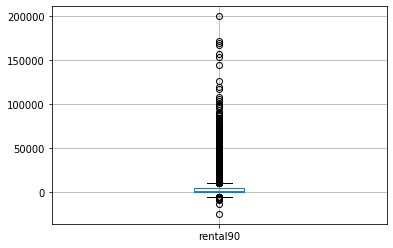

In [22]:
data.boxplot('rental90')

In [23]:
#checking mean of the column aon

data['aon'].mean()

8112.343444891092

In [24]:
data.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
count,209593.000000,0.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,0.0
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN
max,1.000000,NaN,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,NaN


In [25]:
#dropping the columns which has more than 80% of NaN values

data.drop(['pdate','msisdn','pcircle'],axis=1,inplace=True)

In [26]:
for i in data.columns:
    data[i]=data[i].fillna(np.inf)

In [27]:
mode=data['aon'].mode()

In [28]:
mode=mode.astype(float)

In [29]:
mode

0    95.0
dtype: float64

In [30]:
data['aon']=data['aon'].fillna(95)

In [31]:
data['aon'].mode()

0    95.0
dtype: float64

In [32]:
mode=dict(enumerate(data[i].mode() for i in data.columns))

In [33]:
labels=dict(enumerate(data.columns))

In [34]:
List=[]
for i,j in mode.items():
    List.append(float(j))

In [35]:
List

[1.0,
 95.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1539.0,
 1.0,
 0.0,
 0.0,
 1539.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1539.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 6.0,
 6.0,
 0.0,
 1.0,
 6.0,
 6.0,
 0.0,
 0.0,
 0.0]

In [36]:
data[data.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [37]:
data['daily_decr30']=data['daily_decr30'].fillna(0.0)

In [38]:
data['daily_decr90']=data['daily_decr90'].fillna(0.0)

In [39]:
data['rental30']=data['rental30'].fillna(0.0)
data['rental90']=data['rental90'].fillna(0.0)

In [40]:
data[data.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [41]:
data['label'][data['label']==1].count()

183431

In [42]:
data['label'][data['label']==0].count()

26162

In [43]:
headnames=[str(i) for i in data.columns]

In [44]:
headnames

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [45]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()

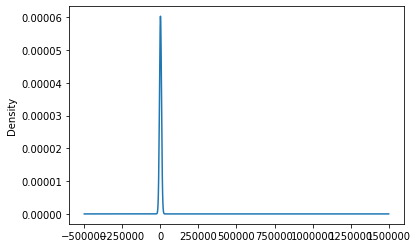

In [46]:
data.aon.plot(kind='density')

In [47]:
Y=data.label

In [48]:
data.drop('label',axis=1,inplace=True)

In [49]:
data=scaller.fit_transform(data)

In [50]:
data=pd.DataFrame(data,columns=headnames[1:])

In [51]:
data

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.000000,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.0,0.0,0.000000,0.0,0.000298,0.001789,0.000895,0.0,0.000298,0.001789,0.000895,0.0,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.000000,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.0,0.0,0.000000,0.0,0.000045,0.000543,0.000543,0.0,0.000045,0.000543,0.000543,0.0,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.000000,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.0,0.0,0.000000,0.0,0.000238,0.001427,0.001427,0.0,0.000238,0.001427,0.001427,0.0,0.000000,0.000000
3,0.143966,0.012681,0.012681,0.095233,0.095233,0.024492,0.000000,0.565709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000597,0.000000,0.565709,0.565709,0.001493,0.0,0.0,0.000000,0.0,0.001195,0.007168,0.003584,0.0,0.001195,0.007168,0.003584,0.0,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.000000,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.0,0.0,0.000000,0.0,0.000224,0.001345,0.000192,0.0,0.000224,0.001345,0.000192,0.0,0.000075,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.025266,0.009498,0.009498,0.068118,0.068118,0.000063,0.000000,0.253163,0.000188,0.000125,0.650668,0.198753,0.005742,0.000188,0.000125,0.650668,0.198753,0.005742,0.0,0.0,0.000000,0.0,0.000125,0.000750,0.000375,0.0,0.000125,0.000750,0.000375,0.0,0.000063,0.000063
209589,0.182149,0.006258,0.006258,0.292856,0.292856,0.000678,0.000000,0.130978,0.000678,0.000169,0.523913,0.130978,0.027331,0.001017,0.000339,0.684204,0.130978,0.018944,0.0,0.0,0.000000,0.0,0.000508,0.003050,0.001017,0.0,0.000508,0.003050,0.001017,0.0,0.000169,0.000169
209590,0.035028,0.409517,0.411634,0.202693,0.307513,0.000104,0.000000,0.053216,0.000173,0.000277,0.322755,0.053216,0.001768,0.000380,0.000173,0.642883,0.053216,0.001630,0.0,0.0,0.000000,0.0,0.000138,0.001452,0.000415,0.0,0.000207,0.001867,0.000415,0.0,0.000138,0.000133
209591,0.061433,0.442953,0.446008,0.014607,0.034923,0.000071,0.001348,0.027418,0.000177,0.000142,0.431098,0.027418,0.005817,0.000213,0.000142,0.636360,0.085499,0.003547,0.0,0.0,0.000035,0.0,0.000071,0.000638,0.000426,0.0,0.000106,0.000851,0.000426,0.0,0.000000,0.000372


## Feature Engineering

For feature selection I used extra tree classifier. This is one of the ensemble learning where it aggregates the result of multiple 
de-correlated decision trees collected in output

In [52]:
from sklearn.ensemble import ExtraTreesClassifier as etc
array=data.values
x=array
y=Y.values
model=etc()
model.fit(x,y)
score=model.feature_importances_
score

array([0.04788556, 0.08032549, 0.07678639, 0.06484018, 0.05625142,
       0.03875589, 0.0031329 , 0.0314397 , 0.02495042, 0.01386421,
       0.04675415, 0.03281989, 0.02411732, 0.02700392, 0.01803125,
       0.0637538 , 0.03598398, 0.02597072, 0.00228448, 0.00113624,
       0.00287384, 0.00090475, 0.04051976, 0.03925995, 0.03818517,
       0.00721388, 0.03346375, 0.03881511, 0.04937171, 0.00706254,
       0.01196695, 0.01427467])

In [53]:
ans=list(zip(data.columns,score))

In [54]:
ans

[('aon', 0.04788556489584674),
 ('daily_decr30', 0.08032549408143926),
 ('daily_decr90', 0.07678638824020409),
 ('rental30', 0.06484018356730202),
 ('rental90', 0.056251423913671286),
 ('last_rech_date_ma', 0.038755885266883776),
 ('last_rech_date_da', 0.0031328975261312787),
 ('last_rech_amt_ma', 0.03143970446644315),
 ('cnt_ma_rech30', 0.024950417583751095),
 ('fr_ma_rech30', 0.013864208085734015),
 ('sumamnt_ma_rech30', 0.046754147646818345),
 ('medianamnt_ma_rech30', 0.03281988550687321),
 ('medianmarechprebal30', 0.024117316492194216),
 ('cnt_ma_rech90', 0.027003922218089407),
 ('fr_ma_rech90', 0.018031251685351784),
 ('sumamnt_ma_rech90', 0.06375379923771134),
 ('medianamnt_ma_rech90', 0.03598398305080767),
 ('medianmarechprebal90', 0.025970724497962658),
 ('cnt_da_rech30', 0.002284484712696002),
 ('fr_da_rech30', 0.0011362437195931155),
 ('cnt_da_rech90', 0.0028738385049800154),
 ('fr_da_rech90', 0.0009047500421695044),
 ('cnt_loans30', 0.040519757790124435),
 ('amnt_loans30', 0

In [55]:
from operator import itemgetter
sorted(ans,key=itemgetter(1),reverse=True)

[('daily_decr30', 0.08032549408143926),
 ('daily_decr90', 0.07678638824020409),
 ('rental30', 0.06484018356730202),
 ('sumamnt_ma_rech90', 0.06375379923771134),
 ('rental90', 0.056251423913671286),
 ('maxamnt_loans90', 0.049371711810905834),
 ('aon', 0.04788556489584674),
 ('sumamnt_ma_rech30', 0.046754147646818345),
 ('cnt_loans30', 0.040519757790124435),
 ('amnt_loans30', 0.0392599471220504),
 ('amnt_loans90', 0.0388151143952173),
 ('last_rech_date_ma', 0.038755885266883776),
 ('maxamnt_loans30', 0.03818517041037105),
 ('medianamnt_ma_rech90', 0.03598398305080767),
 ('cnt_loans90', 0.033463747362000994),
 ('medianamnt_ma_rech30', 0.03281988550687321),
 ('last_rech_amt_ma', 0.03143970446644315),
 ('cnt_ma_rech90', 0.027003922218089407),
 ('medianmarechprebal90', 0.025970724497962658),
 ('cnt_ma_rech30', 0.024950417583751095),
 ('medianmarechprebal30', 0.024117316492194216),
 ('fr_ma_rech90', 0.018031251685351784),
 ('payback90', 0.014274669832940949),
 ('fr_ma_rech30', 0.0138642080857

In [56]:
from sklearn.ensemble import RandomForestClassifier as rf, GradientBoostingClassifier as gb

In [57]:
RF=rf()
GB=gb()
from sklearn.feature_selection import RFE

In [58]:
rfe=RFE(RF,25)
fit=rfe.fit(x,y)
results=fit.transform(x)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


25
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False  True  True
  True False  True  True  True False  True  True]
[1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 6 7 4 8 1 1 1 2 1 1 1 3 1 1]


In [59]:
type(fit.support_)

numpy.ndarray

In [60]:
j=1
names=[]
for i in fit.support_:
    if i==True:
        names.append(headnames[j])
    j+=1

In [61]:
datafs=pd.DataFrame()
for i in names:
    datafs[i]=data[i]

In [62]:
from scipy import stats
datafs[(np.abs(stats.zscore(datafs))<3).all(axis=1)]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.001789,0.000895,0.000298,0.001789,0.000895,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000543,0.000543,0.000045,0.000543,0.000543,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.001427,0.001427,0.000238,0.001427,0.001427,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.000224,0.001345,0.000192,0.000224,0.001345,0.000192,0.000075,0.000075
5,0.040807,0.162178,0.162472,0.026448,0.027310,0.000144,0.110568,0.000287,0.000718,0.442271,0.110568,0.001106,0.000575,0.000000,0.843735,0.110568,0.004016,0.000216,0.001293,0.000431,0.000216,0.001293,0.000431,0.000790,0.000599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.025266,0.009498,0.009498,0.068118,0.068118,0.000063,0.253163,0.000188,0.000125,0.650668,0.198753,0.005742,0.000188,0.000125,0.650668,0.198753,0.005742,0.000125,0.000750,0.000375,0.000125,0.000750,0.000375,0.000063,0.000063
209589,0.182149,0.006258,0.006258,0.292856,0.292856,0.000678,0.130978,0.000678,0.000169,0.523913,0.130978,0.027331,0.001017,0.000339,0.684204,0.130978,0.018944,0.000508,0.003050,0.001017,0.000508,0.003050,0.001017,0.000169,0.000169
209590,0.035028,0.409517,0.411634,0.202693,0.307513,0.000104,0.053216,0.000173,0.000277,0.322755,0.053216,0.001768,0.000380,0.000173,0.642883,0.053216,0.001630,0.000138,0.001452,0.000415,0.000207,0.001867,0.000415,0.000138,0.000133
209591,0.061433,0.442953,0.446008,0.014607,0.034923,0.000071,0.027418,0.000177,0.000142,0.431098,0.027418,0.005817,0.000213,0.000142,0.636360,0.085499,0.003547,0.000071,0.000638,0.000426,0.000106,0.000851,0.000426,0.000000,0.000372


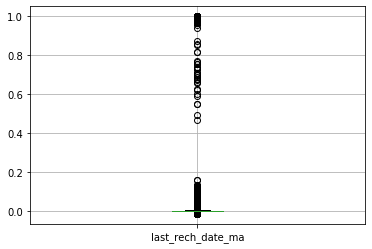

In [63]:
data.boxplot('last_rech_date_ma')

In [64]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#  ML Modeling

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(datafs,Y,random_state=7)

In [67]:
model=RandomForestClassifier()

In [68]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pre=model.predict(x_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.42      0.75      0.53      3750
           1       0.98      0.92      0.95     48649

    accuracy                           0.91     52399
   macro avg       0.70      0.83      0.74     52399
weighted avg       0.94      0.91      0.92     52399



In [72]:
from sklearn.utils import resample
datafs['lable']=Y
df_majority=datafs[datafs.lable==1]
df_minority=datafs[datafs.lable==0]

df_downsamp=resample(df_majority,replace=False,n_samples=23737,random_state=7)

In [73]:
df_downsamp

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,lable
191382,0.814724,0.410001,0.410001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000406,0.002436,0.002436,0.000406,0.002436,0.002436,0.000000,0.000000,1
116468,0.307932,0.002121,0.002121,0.091399,0.091399,0.003812,0.421194,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.001634,0.001634,0.000272,0.001634,0.001634,0.000000,0.000000,1
47886,0.002902,0.317388,0.318960,0.387959,0.391902,0.001043,0.407615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000065,0.511247,0.255624,0.023511,0.000033,0.000391,0.000391,0.000033,0.000391,0.000391,0.000000,0.000000,1
99682,0.997815,0.002531,0.002531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005423,0.032537,0.032537,0.005423,0.032537,0.032537,0.000000,0.000000,1
110726,0.017341,0.402167,0.549879,0.202064,0.267092,0.000195,0.030007,0.000234,0.000156,0.329956,0.044990,0.000097,0.000390,0.000234,0.555006,0.059974,0.001091,0.000078,0.000468,0.000234,0.000195,0.001169,0.000234,0.000260,0.000325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35078,0.028018,0.004670,0.004670,0.034194,0.034194,0.000293,0.113392,0.000733,0.000293,0.679325,0.113392,0.008889,0.000880,0.000293,0.704703,0.113392,0.006982,0.000733,0.004401,0.000880,0.000733,0.004401,0.000880,0.000675,0.000675,1
192614,0.056246,0.572767,0.572767,0.033804,0.033804,0.000676,0.259950,0.000169,0.000000,0.259950,0.259950,0.016046,0.000169,0.000000,0.259950,0.259950,0.016046,0.000338,0.004054,0.002027,0.000338,0.004054,0.002027,0.000000,0.000000,1
54357,0.062261,0.458518,0.656266,0.168466,0.193600,0.000353,0.060416,0.000118,0.000510,0.211476,0.060416,0.003040,0.000275,0.000196,0.483368,0.060416,0.002255,0.000157,0.000942,0.000236,0.000393,0.002355,0.000236,0.000196,0.000218,1
19648,0.036821,0.092235,0.092624,0.357447,0.379949,0.000099,0.037955,0.000592,0.000099,0.569963,0.038103,0.002706,0.000690,0.000049,0.616593,0.038103,0.002706,0.000493,0.002958,0.000296,0.000641,0.003845,0.000296,0.000158,0.000152,1


In [74]:
df_down=pd.concat([df_downsamp,df_minority])

In [75]:
y=df_down.lable
df_down.drop(['lable'],axis=1,inplace=True)
df_down

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
191382,0.814724,0.410001,0.410001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000406,0.002436,0.002436,0.000406,0.002436,0.002436,0.00000,0.000000
116468,0.307932,0.002121,0.002121,0.091399,0.091399,0.003812,0.421194,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.000000,0.421194,0.421194,0.026573,0.000272,0.001634,0.001634,0.000272,0.001634,0.001634,0.00000,0.000000
47886,0.002902,0.317388,0.318960,0.387959,0.391902,0.001043,0.407615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000065,0.511247,0.255624,0.023511,0.000033,0.000391,0.000391,0.000033,0.000391,0.000391,0.00000,0.000000
99682,0.997815,0.002531,0.002531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005423,0.032537,0.032537,0.005423,0.032537,0.032537,0.00000,0.000000
110726,0.017341,0.402167,0.549879,0.202064,0.267092,0.000195,0.030007,0.000234,0.000156,0.329956,0.044990,0.000097,0.000390,0.000234,0.555006,0.059974,0.001091,0.000078,0.000468,0.000234,0.000195,0.001169,0.000234,0.00026,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0.017632,0.653490,0.653659,0.209399,0.318622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000115,0.000691,0.000691,0.000115,0.000691,0.000691,0.00000,0.000000
209549,0.059003,0.051040,0.053087,0.522900,0.667573,0.000070,0.053894,0.000070,0.000000,0.053894,0.053894,0.001387,0.000140,0.002800,0.458935,0.229468,0.003487,0.000070,0.000420,0.000420,0.000140,0.000840,0.000420,0.00000,0.001785
209554,0.160290,0.313360,0.314924,0.120590,0.141176,0.006679,0.497458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215,0.000000,0.497458,0.497458,0.004309,0.000215,0.001293,0.001293,0.000215,0.001293,0.001293,0.00000,0.000000
209571,0.109254,0.246735,0.248520,0.247799,0.305521,0.001850,0.254177,0.000264,0.000396,0.508355,0.254177,0.000819,0.000264,0.000396,0.508355,0.254177,0.000819,0.000132,0.000793,0.000793,0.000132,0.000793,0.000793,0.00000,0.000000


In [76]:
x_train,x_test,y_train,y_test=train_test_split(df_down,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6453
           1       0.81      0.79      0.80      6022

    accuracy                           0.81     12475
   macro avg       0.81      0.81      0.81     12475
weighted avg       0.81      0.81      0.81     12475



In [77]:
y=datafs['lable']
datafs.drop(['lable'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))

              precision    recall  f1-score   support

           0       0.95      0.43      0.60     57535
           1       0.82      0.99      0.90    152058

    accuracy                           0.84    209593
   macro avg       0.89      0.71      0.75    209593
weighted avg       0.86      0.84      0.82    209593



In [78]:
datafs['label']=y[:]

In [79]:
df_majority=datafs[datafs.label==1]
df_minority=datafs[datafs.label==0]

df_upsamp=resample(df_minority,replace=True,n_samples=166264,random_state=7)

df_up=pd.concat([df_majority,df_upsamp])
y=df_up.label
df_up.drop('label',axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split(df_up,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     43362
           1       0.95      1.00      0.97     44062

    accuracy                           0.97     87424
   macro avg       0.97      0.97      0.97     87424
weighted avg       0.97      0.97      0.97     87424



In [80]:
y=datafs['label']
datafs.drop(['label'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))
from sklearn.metrics import confusion_matrix
result=confusion_matrix(pre,y)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     28286
           1       0.99      1.00      0.99    181307

    accuracy                           0.99    209593
   macro avg       0.99      0.96      0.98    209593
weighted avg       0.99      0.99      0.99    209593



In [ ]:
from sklearn.metrics import accuracy_score
x_train,x_val,y_train,y_val=train_test_split(df_up,y,random_state=1,test_size=0.2)

In [90]:
#MODEL-1) LogisticRegression
#------------------------------------------
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-1: Accuracy of LogisticRegression : ", acc_logreg  )



#OUTPUT:-
#MODEL-1: Accuracy of LogisticRegression :  77.0

MODEL-1: Accuracy of LogisticRegression :  77.09


In [91]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-6: Accuracy of DecisionTreeClassifier : ", acc_decisiontree  )

#OUTPUT:-
#MODEL-6: Accuracy of DecisionTreeClassifier :  81.22


MODEL-6: Accuracy of DecisionTreeClassifier :  81.22
